Importing modules

In [23]:
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from Layer import *
from network import Network
from activation_func import tanh, tanh_prime, sigmoid, sigmoid_prime, softmax, softmax_prime, relu, relu_prime
from loss_func import mse, mse_prime, cross_entropy, cross_entropy_prime
from data_func import vectorize_labels, k_fold, import_data
from performance_func import plot_confusion_matrix, plot_error

Importing data

In [24]:
# import data and initialize seed
np.random.seed(10)
training_size = 6000
normalize = True
training, labels, test, original_test_labels, test_labels = import_data(size=training_size, normalize=normalize)

# specify input and output parameters
features = 784
output_classes = 10

Setting configuration

In [25]:
# hyper parameters
learning_rate = 5e-3
hidden_layers = [30]
max_epochs = 10
batch_size = 32
weight_decay = 0.01
momentum = False



Train the network

In [26]:
# set up the network with specified layers, loss, and activation
net = Network()
net.setup_net(hidden_layers, features, output_classes,
              activation=relu, activation_prime=relu_prime,
              loss_activation=softmax, loss_activation_prime=softmax_prime,
              loss=cross_entropy, loss_prime=cross_entropy_prime)
# prepare data for training
fold_train_data, fold_train_labels, fold_val_data, fold_val_labels = k_fold(training, labels, k=5, n=5)

# train the model on training data and labels using specific hyper-parameters
errors, val_errors, val_accs = net.fit(fold_train_data, fold_train_labels, fold_val_data, fold_val_labels,
                             max_epochs, learning_rate, batch_size, momentum, weight_decay)

# print the accuracy
print("The test accuracy of the network is: {}".format(
      net.accuracy(x=test, y_true=original_test_labels, errors=errors, val_errors=val_errors)))

epoch 1/10   training error=3.862628  validation error=2.639811 validation accuracy=0.253333
epoch 2/10   training error=2.124332  validation error=1.810408 validation accuracy=0.432500
epoch 3/10   training error=1.576840  validation error=1.442041 validation accuracy=0.545833
epoch 4/10   training error=1.296489  validation error=1.237067 validation accuracy=0.615833
epoch 5/10   training error=1.121475  validation error=1.091795 validation accuracy=0.664167
epoch 6/10   training error=0.995594  validation error=0.987632 validation accuracy=0.690000
epoch 7/10   training error=0.896195  validation error=0.906513 validation accuracy=0.714167
epoch 8/10   training error=0.821555  validation error=0.840904 validation accuracy=0.730833
epoch 9/10   training error=0.760164  validation error=0.788563 validation accuracy=0.740000
epoch 10/10   training error=0.712207  validation error=0.747730 validation accuracy=0.753333


ValueError: not enough values to unpack (expected 3, got 2)

Plot results

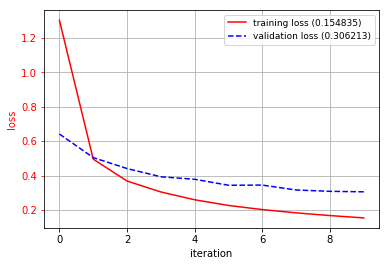

In [11]:
plot_error(errors, val_errors)